# Exercises

In [105]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pydataset import data

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import acquire as a
import prepare as p

# supress scientific notation
np.set_printoptions(suppress=True)

# custom visuals for this lesson
import viz_kmeans


from sklearn.cluster import KMeans

**1. Clustering with the Iris Dataset**

Using this lesson as a guide, perform clustering on the iris dataset.

In [106]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [107]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


    a. Choose features other than the ones used in the lesson.

In [108]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


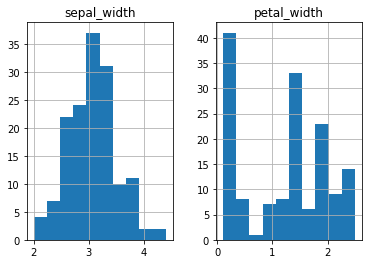

In [109]:
# look at distribution of sepal length and petal_length

X.hist();

In [110]:
#scale the X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns =X.columns).set_index([X.index.values])

In [111]:
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


    b. Visualize the results of your clustering.

In [112]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [113]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [114]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
100,5.7,2.8,4.1,1.3,versicolor,1
105,6.5,3.0,5.8,2.2,virginica,2
89,5.6,3.0,4.1,1.3,versicolor,1
84,6.0,2.7,5.1,1.6,versicolor,1
133,6.4,2.8,5.6,2.2,virginica,2
23,4.6,3.6,1.0,0.2,setosa,0
146,6.7,3.0,5.2,2.3,virginica,2
94,5.0,2.3,3.3,1.0,versicolor,1
49,5.3,3.7,1.5,0.2,setosa,0
142,6.9,3.1,5.1,2.3,virginica,2


In [115]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.90625492, -1.25634413],
       [-1.00672719,  0.22991755],
       [ 0.11627194,  0.98166637]])

In [116]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.006727,0.229918
2,0.116272,0.981666


In [117]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
X_scaled['cluster_string'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_width,cluster,cluster_string
1,1.019004,-1.315444,0,cluster_0
2,-0.131979,-1.315444,0,cluster_0
3,0.328414,-1.315444,0,cluster_0
4,0.098217,-1.315444,0,cluster_0
5,1.249201,-1.315444,0,cluster_0


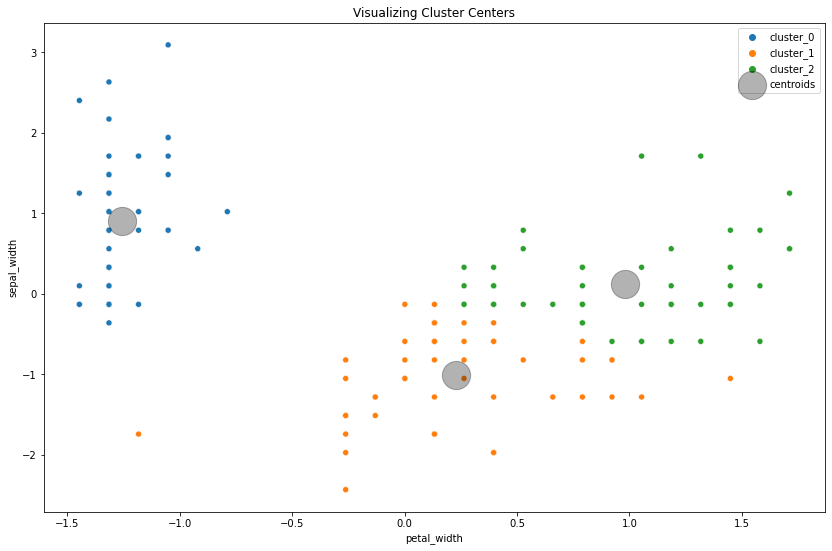

In [118]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster_string')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [119]:
X_scaled.drop(columns=['cluster_string'], inplace = True)

    c. Use the elbow method to visually select a good value for k.

In [120]:
# kmeans object has 'interia' attribute
kmeans.inertia_

79.26009593454638

In [121]:
k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

150.61599687612858

In [122]:
k =3 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.26009593454638

In [123]:
k =4 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.20714767894183

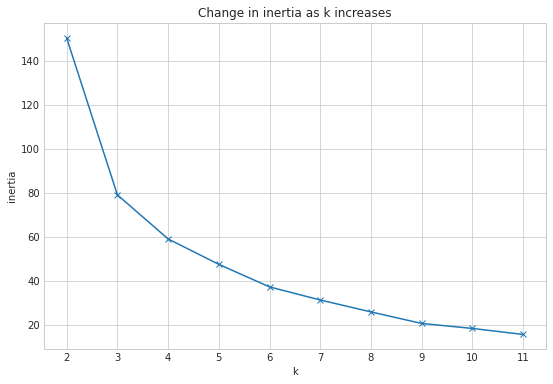

In [124]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**k = 4**

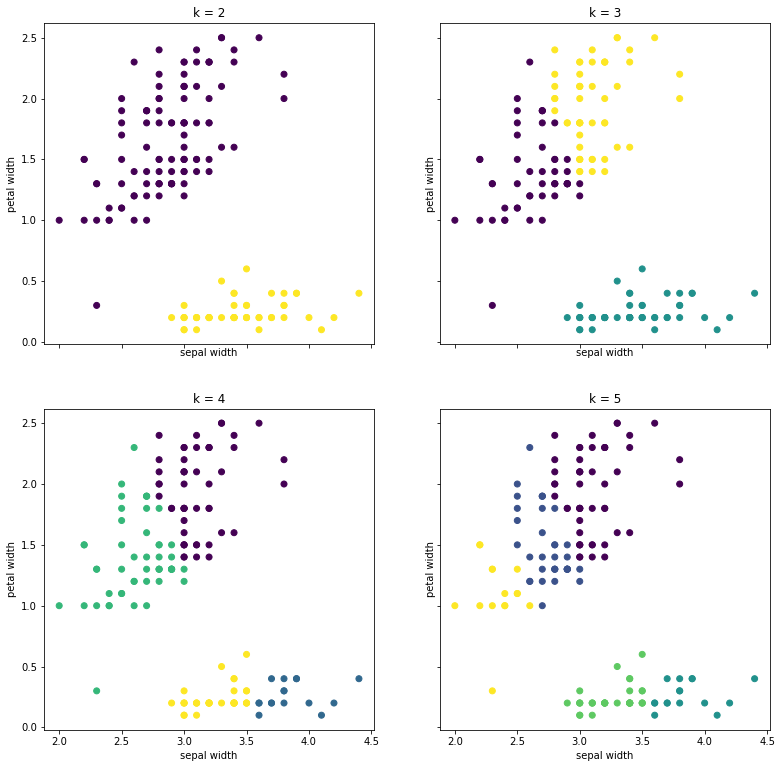

In [125]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

    d. Repeat the clustering, this time with 3 different features.

In [126]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0


In [127]:
X= iris[['sepal_width', 'petal_width', 'petal_length']]

In [128]:
#scale
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [129]:
X_scaled.head()

,sepal_width,petal_width,petal_length
1,1.019004,-1.315444,-1.340227
2,-0.131979,-1.315444,-1.340227
3,0.328414,-1.315444,-1.397064
4,0.098217,-1.315444,-1.283389
5,1.249201,-1.315444,-1.340227


In [130]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [131]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.46095159, -1.26757805,  0.        ],
       [ 0.11627194,  0.98166637,  2.        ],
       [ 1.82469303, -1.23317418,  0.        ],
       [-1.00672719,  0.22991755,  1.        ]])

In [132]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width,petal_length
0,0.460952,-1.267578,6.661338e-16
1,0.116272,0.981666,2.000000e+00
2,1.824693,-1.233174,0.000000e+00
3,-1.006727,0.229918,1.000000e+00


In [133]:
# Labels (same as from predict)

kmeans.labels_

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1], dtype=int32)

In [134]:
k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

277.08449121647055

In [135]:
k =3 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

146.5163498604708

In [136]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

80.77980266763078

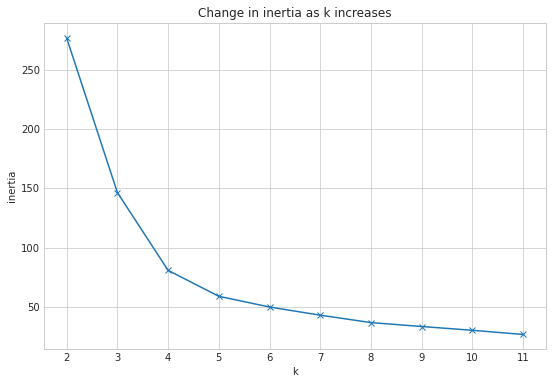

In [137]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

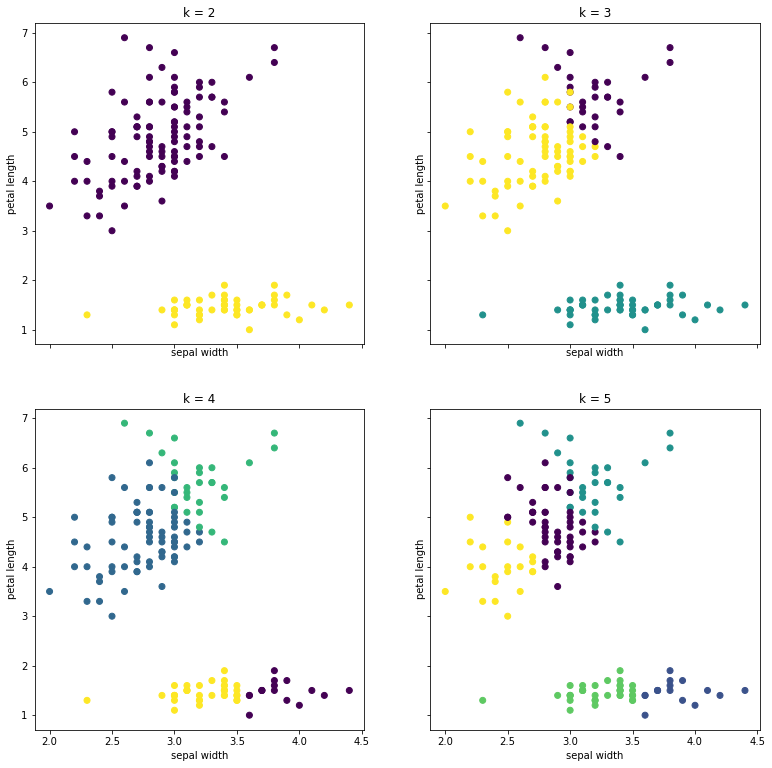

In [138]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal length')

In [139]:
X_scaled.head(1)

,sepal_width,petal_width,petal_length,cluster
1,1.019004,-1.315444,-1.340227,0


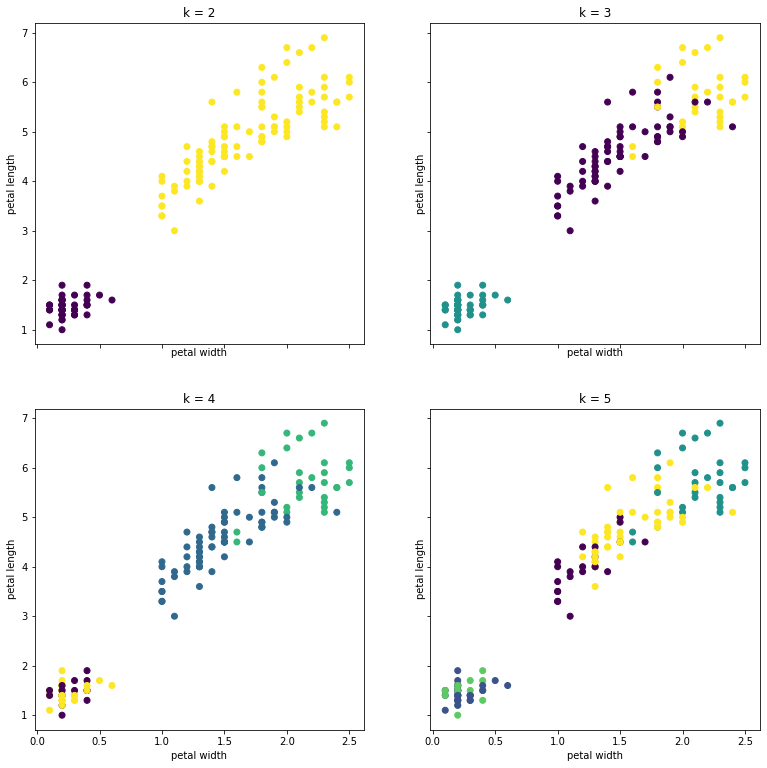

In [140]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='petal length')

**2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!**

In [141]:
import wrangle_mall as wm

In [142]:
df = wm.get_mallcustomer_data()

In [143]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [144]:
a.miss_dup_values(df)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


df shape (200, 4)
df shape after removing outliers (198, 4)
train -> (110, 5)
validate -> (48, 5)
test -> (40, 5)


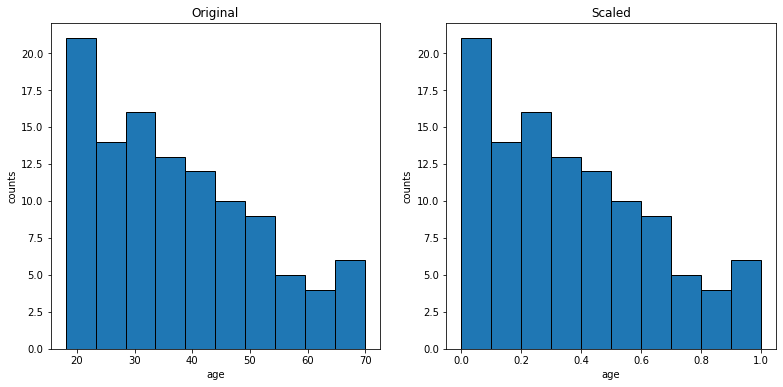

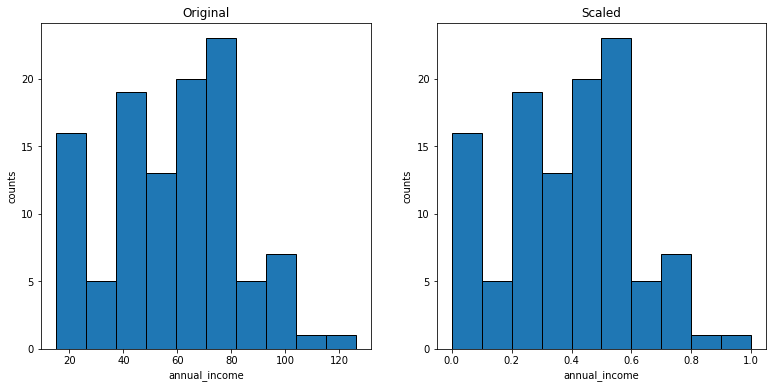

In [145]:
train , validate , test, train_scaled , validate_scaled , test_scaled = wm.wrangle_mall()

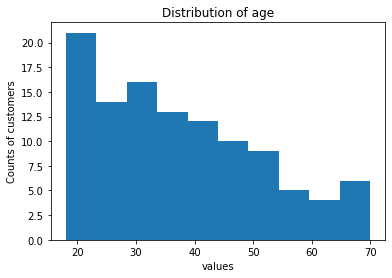

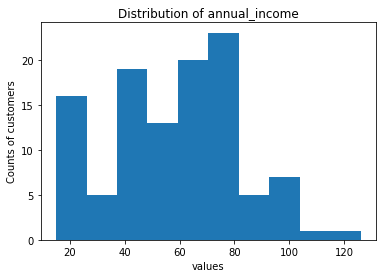

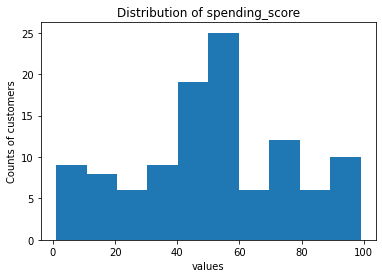

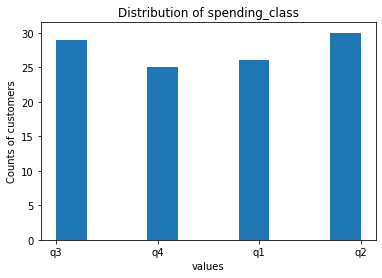

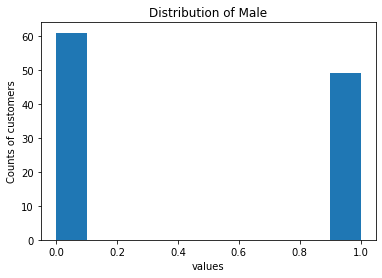

In [146]:
p.distribution(train)

In [147]:
train.head()

,gender,age,annual_income,spending_score,spending_class,Male
customer_id,,,,,,
46,Female,24,39,65,q3,0
40,Female,20,37,75,q4,0
12,Female,35,19,99,q4,0
172,Male,28,87,75,q4,1
96,Male,24,60,52,q3,1


In [148]:

# bin age
train['age_bin'] = pd.cut(train.age,[0,40,80])

In [149]:
train.head()

,gender,age,annual_income,spending_score,spending_class,Male,age_bin
customer_id,,,,,,,
46,Female,24,39,65,q3,0,"(0, 40]"
40,Female,20,37,75,q4,0,"(0, 40]"
12,Female,35,19,99,q4,0,"(0, 40]"
172,Male,28,87,75,q4,1,"(0, 40]"
96,Male,24,60,52,q3,1,"(0, 40]"


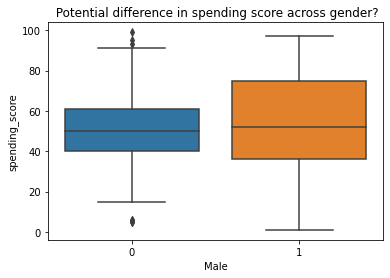

In [150]:
sns.boxplot(train.Male, train.spending_score)
plt.title(' Potential difference in spending score across gender?')
plt.show()

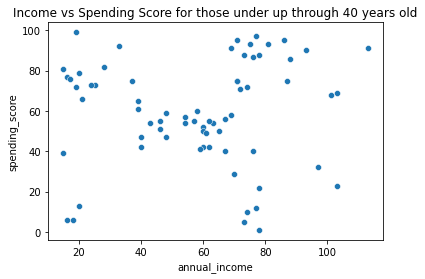

In [151]:

sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age <= 40])
plt.title('Income vs Spending Score for those under up through 40 years old')
plt.show()

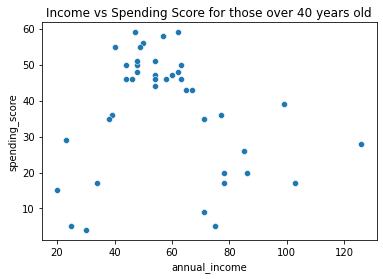

In [152]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age > 40])
plt.title('Income vs Spending Score for those over 40 years old')
plt.show()

Relationship between Income and Spending Score?


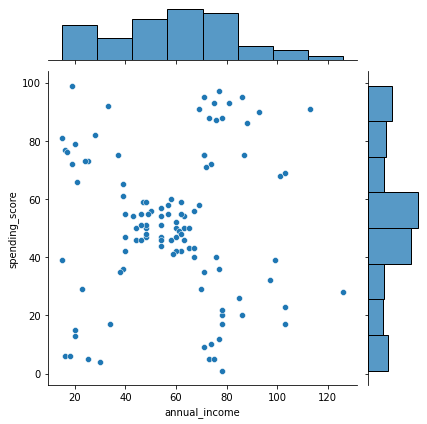

In [153]:
print('Relationship between Income and Spending Score?')
sns.jointplot(x='annual_income', y='spending_score', data=train)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

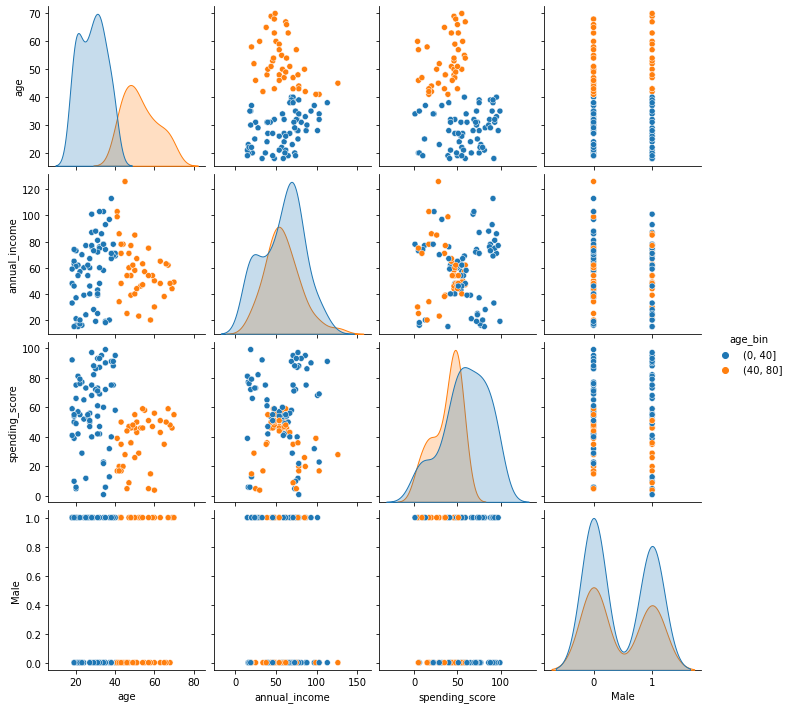

In [154]:
sns.pairplot(train, hue='age_bin')
plt.show()

In [155]:
train.head()

,gender,age,annual_income,spending_score,spending_class,Male,age_bin
customer_id,,,,,,,
46,Female,24,39,65,q3,0,"(0, 40]"
40,Female,20,37,75,q4,0,"(0, 40]"
12,Female,35,19,99,q4,0,"(0, 40]"
172,Male,28,87,75,q4,1,"(0, 40]"
96,Male,24,60,52,q3,1,"(0, 40]"


In [156]:
X= train[['age', 'Male', 'annual_income']]
X.head()

,age,Male,annual_income
customer_id,,,
46,24,0,39
40,20,0,37
12,35,0,19
172,28,1,87
96,24,1,60


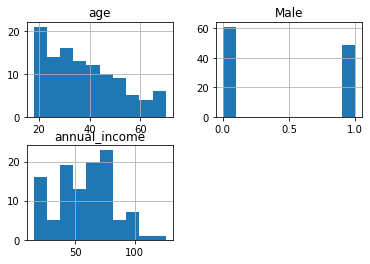

In [157]:
X.hist()
plt.show()

In [158]:
#scale the X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [159]:
# look at the head
X_scaled.head()

,age,Male,annual_income
46,0.115385,0.0,0.216216
40,0.038462,0.0,0.198198
12,0.326923,0.0,0.036036
172,0.192308,1.0,0.648649
96,0.115385,1.0,0.405405


In [160]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1],
      dtype=int32)

In [161]:
# make a new column names cluster in iris and X_scaled dataframe

train['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [95]:
train.head()

,gender,age,annual_income,spending_score,spending_class,Male,age_bin,cluster
customer_id,,,,,,,,
46,Female,24,39,65,q3,0,"(0, 40]",1
40,Female,20,37,75,q4,0,"(0, 40]",1
12,Female,35,19,99,q4,0,"(0, 40]",1
172,Male,28,87,75,q4,1,"(0, 40]",0
96,Male,24,60,52,q3,1,"(0, 40]",0


In [162]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.12615385, 1.        , 0.33333333],
       [0.37894073, 0.        , 0.39698715],
       [0.61778846, 1.        , 0.42304805]])

In [163]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,Male,annual_income
0,0.126154,1.000000e+00,0.333333
1,0.378941,5.551115e-17,0.396987
2,0.617788,1.000000e+00,0.423048


In [164]:
# Centriods for unscaled data?
centroids = train.groupby('cluster')['age', 'Male', 'annual_income'].mean()
centroids

,age,Male,annual_income
cluster,,,
0,24.560000,1,52.000000
1,37.704918,0,59.065574
2,50.125000,1,61.958333


In [165]:
X_scaled.head()

,age,Male,annual_income,cluster
46,0.115385,0.0,0.216216,1
40,0.038462,0.0,0.198198,1
12,0.326923,0.0,0.036036,1
172,0.192308,1.0,0.648649,0
96,0.115385,1.0,0.405405,0


In [166]:
train.head()

,gender,age,annual_income,spending_score,spending_class,Male,age_bin,cluster
customer_id,,,,,,,,
46,Female,24,39,65,q3,0,"(0, 40]",1
40,Female,20,37,75,q4,0,"(0, 40]",1
12,Female,35,19,99,q4,0,"(0, 40]",1
172,Male,28,87,75,q4,1,"(0, 40]",0
96,Male,24,60,52,q3,1,"(0, 40]",0


In [167]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
train['cluster_str'] = 'cluster_' + train.cluster.astype(str)
train.head()

,gender,age,annual_income,spending_score,spending_class,Male,age_bin,cluster,cluster_str
customer_id,,,,,,,,,
46,Female,24,39,65,q3,0,"(0, 40]",1,cluster_1
40,Female,20,37,75,q4,0,"(0, 40]",1,cluster_1
12,Female,35,19,99,q4,0,"(0, 40]",1,cluster_1
172,Male,28,87,75,q4,1,"(0, 40]",0,cluster_0
96,Male,24,60,52,q3,1,"(0, 40]",0,cluster_0


In [168]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
X_scaled['cluster_str'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,age,Male,annual_income,cluster,cluster_str
46,0.115385,0.0,0.216216,1,cluster_1
40,0.038462,0.0,0.198198,1,cluster_1
12,0.326923,0.0,0.036036,1,cluster_1
172,0.192308,1.0,0.648649,0,cluster_0
96,0.115385,1.0,0.405405,0,cluster_0


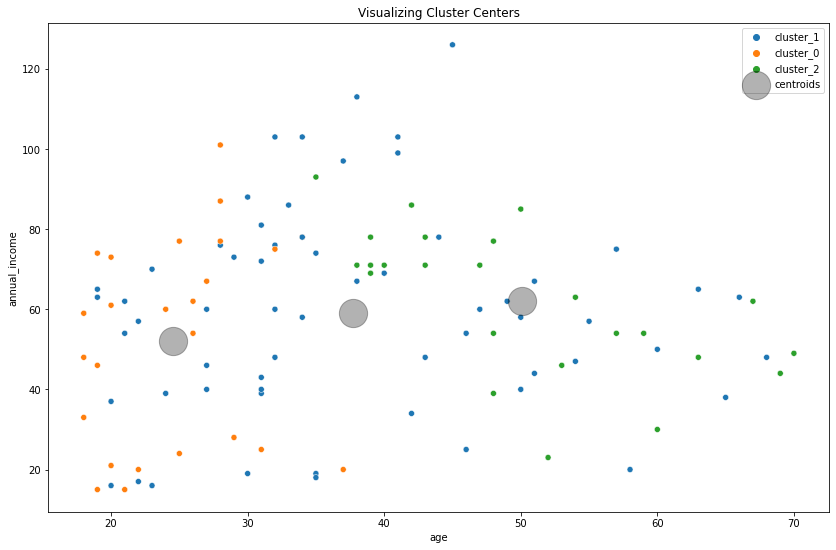

In [175]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y ='annual_income', data = train, hue = 'cluster_str')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age', y = 'annual_income',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

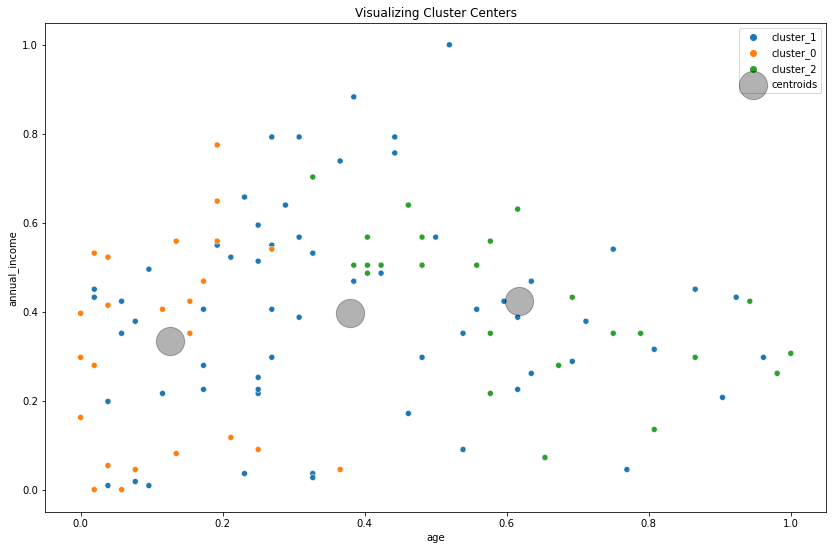

In [176]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y ='annual_income', data = X_scaled, hue = 'cluster_str')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

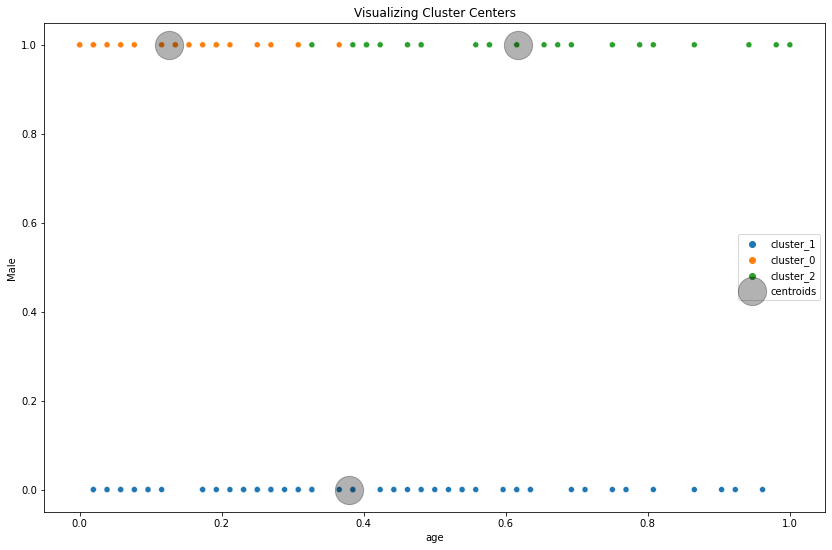

In [177]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y ='Male', data = X_scaled, hue = 'cluster_str')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'Male',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

In [178]:
X_scaled.drop(columns =['cluster_str'], inplace =True)

In [179]:
X_scaled.head(1)

,age,Male,annual_income,cluster
46,0.115385,0.0,0.216216,1


<AxesSubplot:xlabel='age', ylabel='annual_income'>

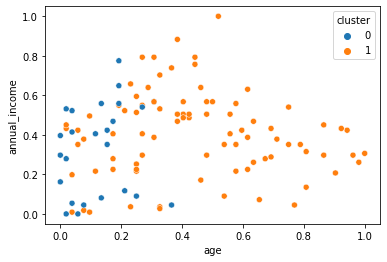

In [180]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

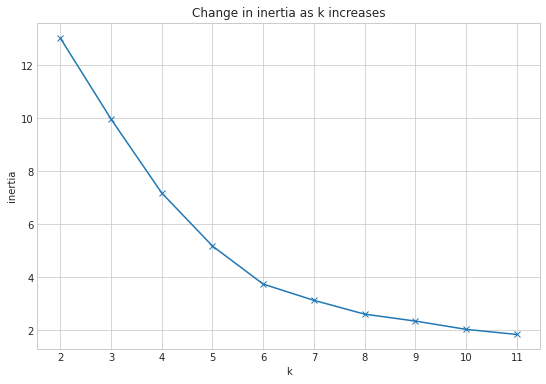

In [185]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

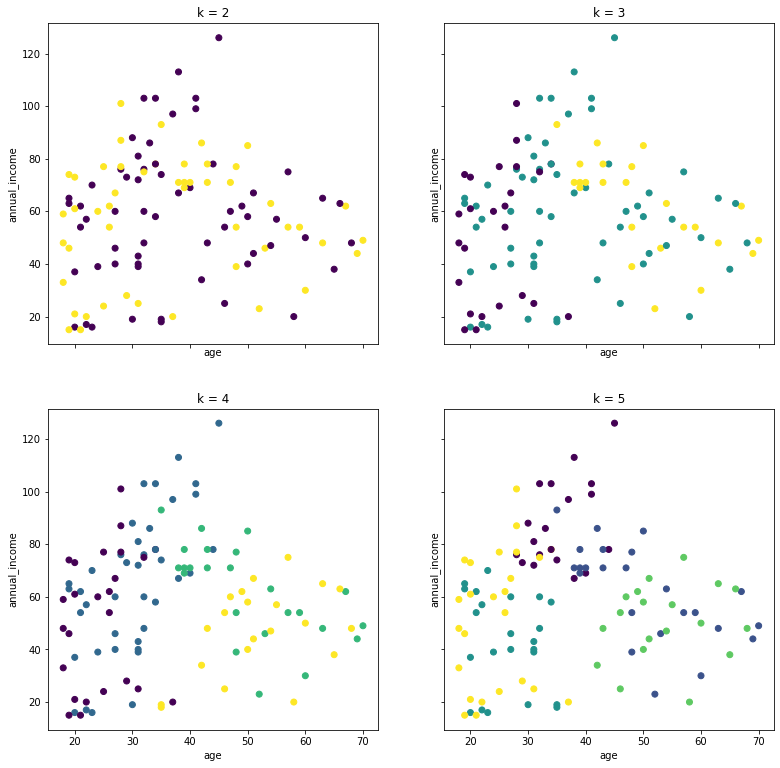

In [190]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

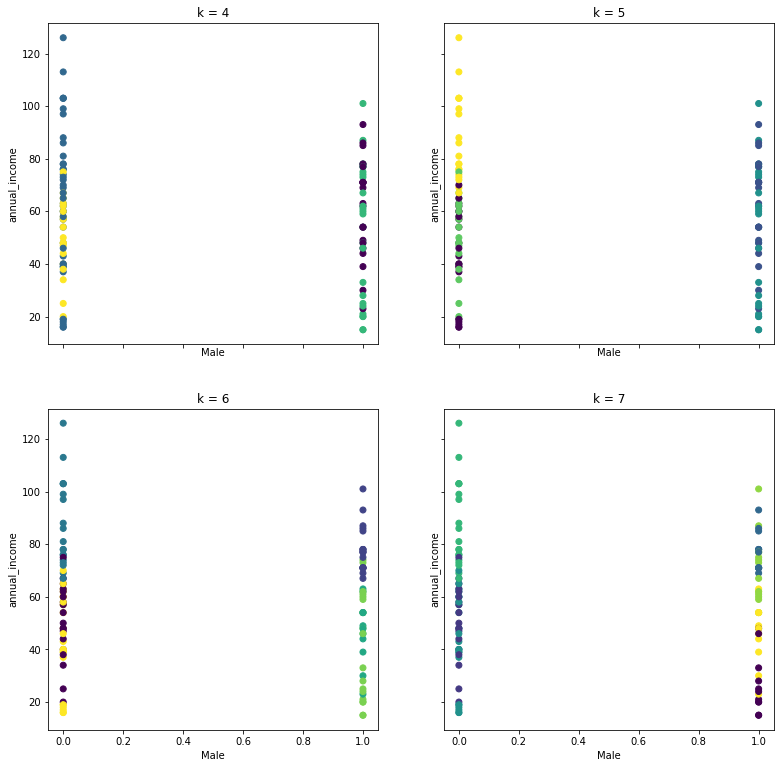

In [189]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 10)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.Male, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Male', ylabel='annual_income')

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

### Bonus

    a) Read in the data from this google sheet: 
    

https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [193]:
# Grab the Google sheet url.
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0' 

In [194]:
 # Turn Google sheet address into a CSV export URL. 

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [195]:
# Read in the data using the pandas `pd.read_csv()` function.
df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


    b) Visualize the data and guess the number and shape of the clusters.

In [196]:
a.summarize(df_googlesheet)

Dataframe shape: 
(800, 2)
Dataframe head: 
          x         y
0 -3.641747  0.121540
1 -7.620447  1.810897
2 -6.505373  0.068072
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       800 non-null    float64
 1   y       800 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB
None
Dataframe Description: 
   count      mean       std        min       25%       50%       75%  \
x  800.0  0.508449  9.906209 -30.572062 -6.068600  0.581809  7.579269   
y  800.0  2.973206  3.156376  -3.146259 -0.047636  3.040642  5.996474   

         max  
x  29.489457  
y   8.817347  
**x**
Unique Values :  800
 
(-30.633000000000003, -29.971]     1
(-29.971, -29.371]                 0
(-29.371, -28.77]                  0
(-28.77, -28.17]                   0
(-28.17, -27.569]                  2
(-27.569, -26.968]                 0
(-26.968, -26

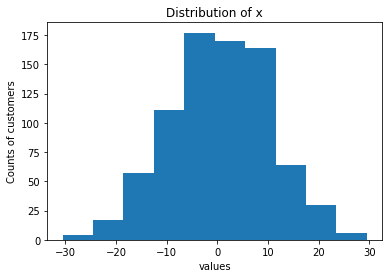

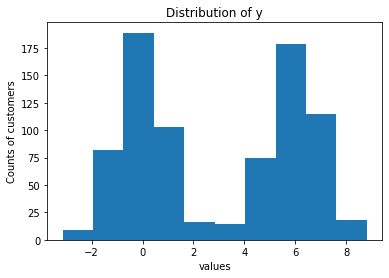

In [197]:
p.distribution(df_googlesheet)

    c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [198]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

35379.36714775726

    d) Repeat the step above but with scaled data.
    c) Write down the takeaways from this exercise.